In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import io
import requests
from matplotlib.colors import LogNorm
from matplotlib.pyplot import figure

In [2]:
url_total  = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_recovs = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'

In [3]:
def covid_country(country = 'Total', url = url_total):
    s=requests.get(url).content
    df = pd.read_csv(io.StringIO(s.decode('utf-8')))
    df.rename(columns={"Country/Region" : "Country", "Province/State" : "Province"}, inplace=True)
    if country == 'Total':
        return df
    else:
        df_country = df[df['Country'].str.match(country)]
        return df_country

In [4]:
def get_cases(df_country, period = '1/22/20'):
    return df_country.loc[:, '1/22/20':].values[0]

# Italy stock of the situation

In [5]:
df_It      = covid_country('Italy', url_total)
df_It_dead = covid_country('Italy', url_deaths)
df_It_reco = covid_country('Italy', url_recovs)

In [6]:
cases_It = get_cases(df_It)
cases_It_dead = get_cases(df_It_dead)
cases_It_reco = get_cases(df_It_reco)

In [7]:
offset_It = 0

First remove all the zeros from the lists

In [8]:
cases_It_dead = cases_It_dead[30:]

In [9]:
cases_It = cases_It[30:]

## Mortality rate

In [10]:
tax_It = []

for x,y in zip(cases_It,cases_It_dead):
    tax_It.append(float(y)/float(x)*100)

In [11]:
x_It = np.arange(0,len(cases_It))

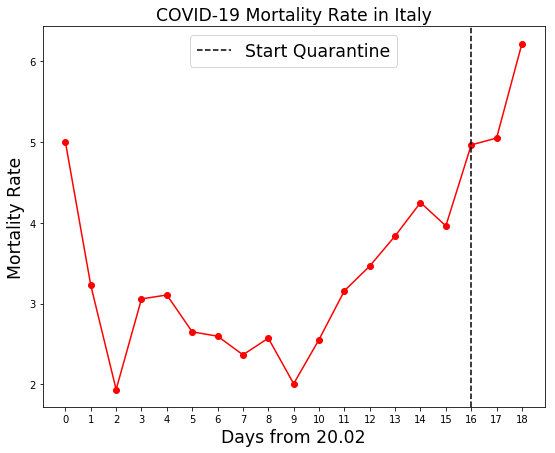

In [12]:
figure(figsize=(9, 7))
plt.title('COVID-19 Mortality Rate in Italy', fontsize='xx-large')
plt.plot(x_It,tax_It,color='red',marker='o')
plt.xticks(x_It)
plt.ylabel('Mortality Rate', fontsize='xx-large')
plt.xlabel('Days from 20.02', fontsize='xx-large')
plt.axvline(x = 16, color='black',linestyle='dashed',label='Start Quarantine')
plt.legend(loc='upper center', fontsize='xx-large')
plt.show()

## New daily infections

In [13]:
growth_It = []

for i in range (0,len(cases_It)-1):
    growth_It.append(cases_It[i+1]-cases_It[i])

In [14]:
x_It = np.arange(1,len(cases_It))

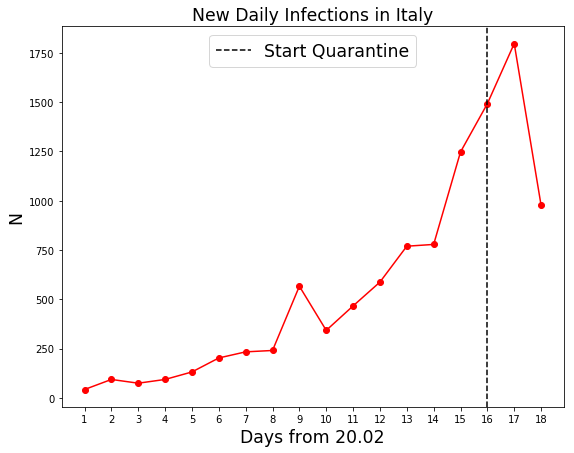

In [15]:
figure(figsize=(9, 7))
plt.title('New Daily Infections in Italy', fontsize='xx-large')
plt.xlabel('Days from 20.02', fontsize='xx-large')
plt.ylabel('N', fontsize='xx-large')
plt.xticks(x_It)
plt.plot(x_It,growth_It,color='red',marker='o')
plt.axvline(x = 16, color='black',linestyle='dashed',label='Start Quarantine')
plt.legend(loc='upper center', fontsize='xx-large')
plt.show()

# China stock of the situation

In [16]:
df_Ch = covid_country('Mainland China', url_total)
df_Ch = df_Ch.sum(numeric_only=True)
cases_Ch = df_Ch[2:].values

df_Ch_dead = covid_country('Mainland China', url_deaths)
df_Ch_dead = df_Ch_dead.sum(numeric_only=True)
cases_Ch_dead = df_Ch_dead[2:].values

df_Ch_reco = covid_country('Mainland China', url_deaths)
df_Ch_reco = df_Ch_reco.sum(numeric_only=True)
recovs_Ch = df_Ch_reco[2:].values

In [17]:
offset_Ch = 0

## Mortality rate

In [18]:
tax_Ch = []

for x,y in zip(cases_Ch,cases_Ch_dead):
    tax_Ch.append(float(y)/float(x)*100)

In [19]:
x_Ch = np.arange(0,len(cases_Ch))

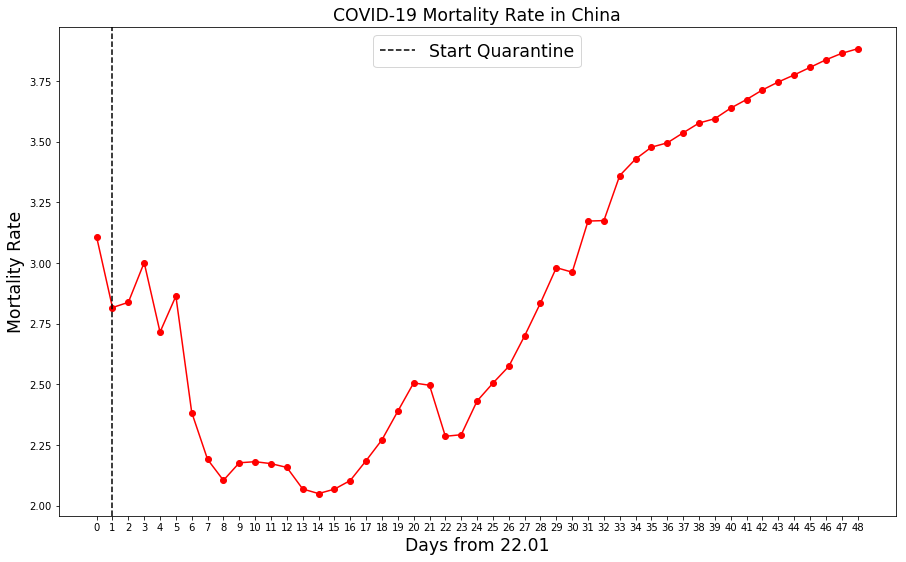

In [20]:
figure(figsize=(15, 9))
plt.title('COVID-19 Mortality Rate in China', fontsize='xx-large')
plt.plot(x_Ch,tax_Ch,color='red',marker='o')
plt.xticks(x_Ch)
plt.ylabel('Mortality Rate', fontsize='xx-large')
plt.xlabel('Days from 22.01', fontsize='xx-large')
plt.axvline(x = 1, color='black',linestyle='dashed',label='Start Quarantine')
plt.legend(loc='upper center', fontsize='xx-large')
plt.show()

## New daily infections

In [21]:
growth_Ch = []

for i in range (0,len(cases_Ch)-1):
    growth_Ch.append(cases_Ch[i+1]-cases_Ch[i])

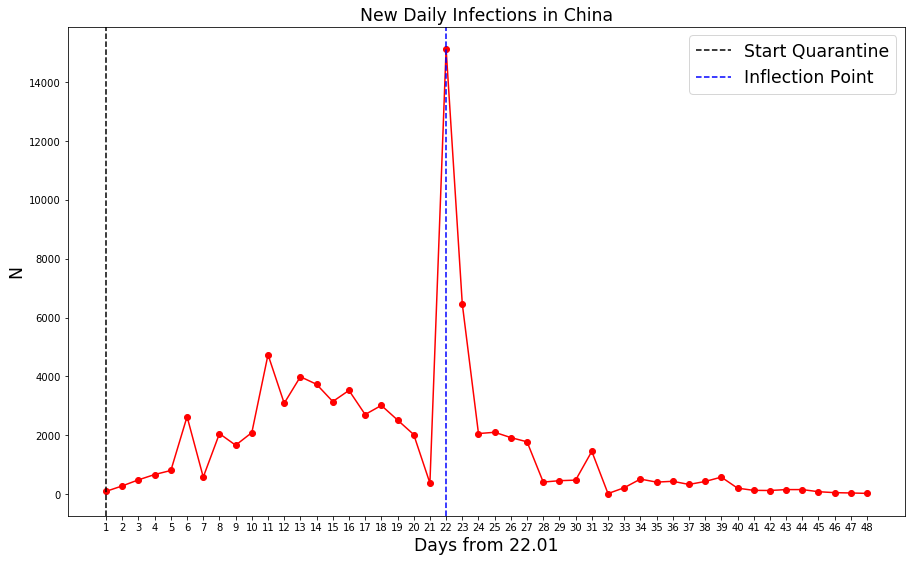

In [22]:
x_Ch = np.arange(1,len(cases_Ch))

figure(figsize=(15, 9))
plt.title('New Daily Infections in China', fontsize='xx-large')
plt.xlabel('Days from 22.01', fontsize='xx-large')
plt.ylabel('N', fontsize='xx-large')
plt.xticks(x_Ch)
plt.plot(x_Ch,growth_Ch,color='red',marker='o')
plt.axvline(x = 1, color='black',linestyle='dashed',label='Start Quarantine')
plt.axvline(x = 22, color='blue',linestyle='dashed',label='Inflection Point')
plt.legend(loc='upper right', fontsize='xx-large')
plt.show()

## Total infections

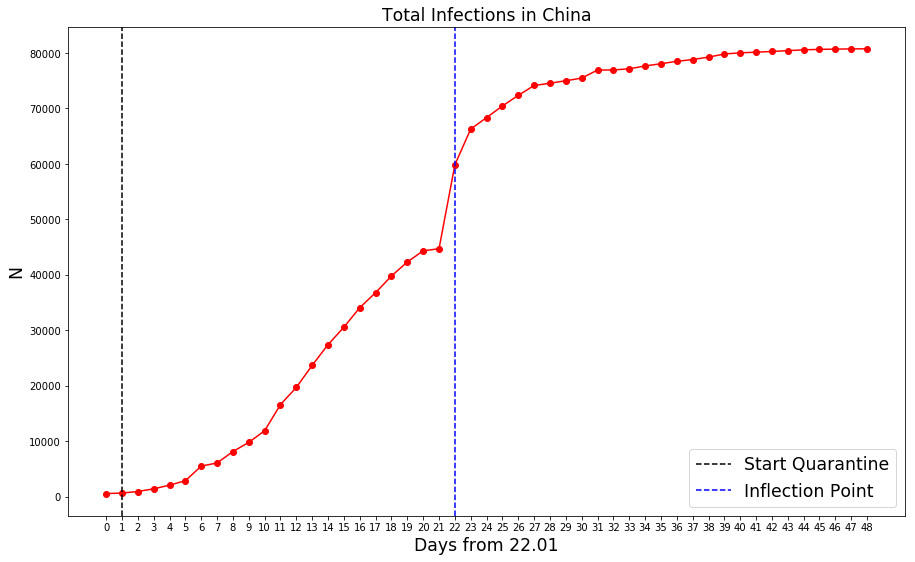

In [23]:
x_Ch = np.arange(0,len(cases_Ch))

figure(figsize=(15, 9))
plt.title('Total Infections in China', fontsize='xx-large')
plt.ylabel('N', fontsize='xx-large')
plt.xlabel('Days from 22.01', fontsize='xx-large')
plt.plot(x_Ch,cases_Ch,color='red',marker='o')
plt.xticks(x_Ch)
plt.axvline(x = 1, color='black',linestyle='dashed',label='Start Quarantine')
plt.axvline(x = 22, color='blue',linestyle='dashed',label='Inflection Point')
plt.legend(loc='lower right', fontsize='xx-large')
plt.show()

# Handmade Italian Prevision

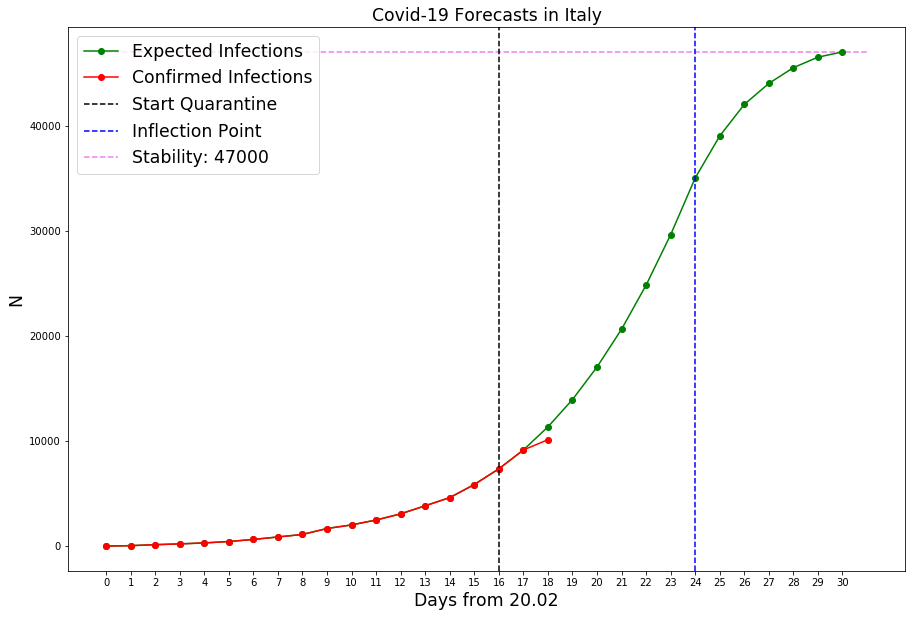

In [24]:
prev_It = np.concatenate((cases_It[:18],11372,13972,17072,20672,24872,29672,35072,39072,42072,44072,45572,46572,47072),axis=None)
x_It = np.arange(0,len(prev_It))

figure(figsize=(15, 10))
plt.title('Covid-19 Forecasts in Italy', fontsize='xx-large')
plt.plot(x_It, prev_It,color='green',marker='o', label='Expected Infections')
plt.plot(cases_It,color='red',marker='o', label='Confirmed Infections')
plt.ylabel('N', fontsize='xx-large')
plt.xlabel('Days from 20.02', fontsize='xx-large')
plt.xticks(x_It)
plt.axvline(x = 16, color='black',linestyle='dashed',label='Start Quarantine')
plt.axvline(x = 24, color='blue',linestyle='dashed',label='Inflection Point')
plt.hlines(max(prev_It), 0, len(prev_It), colors='violet', linestyles='dashed', label='Stability: 47000')
plt.legend(loc='upper left', fontsize='xx-large')
plt.show()

In [25]:
growth_prev_It = []

for i in range (0,len(prev_It)-1):
    growth_prev_It.append(prev_It[i+1]-prev_It[i])

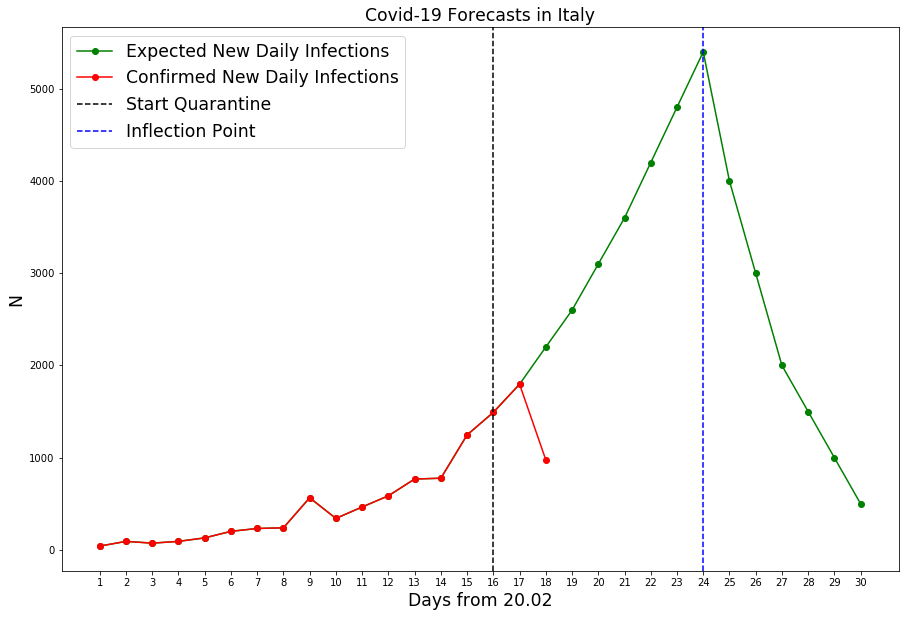

In [26]:
x_prev_It = np.arange(1,len(prev_It))
x_It = np.arange(1,len(cases_It))

figure(figsize=(15, 10))
plt.title('Covid-19 Forecasts in Italy', fontsize='xx-large')
plt.xlabel('Days from 20.02', fontsize='xx-large')
plt.ylabel('N', fontsize='xx-large')
plt.xticks(x_prev_It)
plt.plot(x_prev_It,growth_prev_It,color='green',marker='o',label='Expected New Daily Infections')
plt.plot(x_It, growth_It,color='red',marker='o',label='Confirmed New Daily Infections')
plt.axvline(x = 16, color='black',linestyle='dashed',label='Start Quarantine')
plt.axvline(x = 24, color='blue',linestyle='dashed',label='Inflection Point')
plt.legend(loc='upper left', fontsize='xx-large')
plt.show()